In [4]:
import pandas as pd
import seaborn as sns
from seaborn import load_dataset
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

import numpy as np

import statsmodels.formula.api as smf

# Regressão 01 - tarefa 01

### 1. Explorando a base de gorjetas

a. Na aula fizemos uma regressão de ```tip``` explicada por ```net_bill```. Carregue os pacotes e a base, crie as variáveis necessárias como na aula, e reproduza esta regressão.

b. Reproduza também o gráfico de dispersão dessas duas variáveis.

In [7]:
tips = sns.load_dataset('tips')
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips['tip_pct'] = tips['tip'] / tips['net_bill']

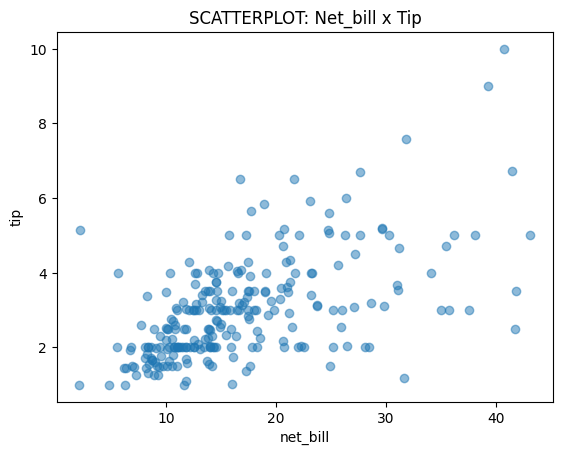

In [8]:
plt.scatter(y='tip', x='net_bill', data = tips,
            alpha = .5)
plt.title('SCATTERPLOT: Net_bill x Tip')
plt.xlabel('net_bill')
plt.ylabel('tip')
plt.show()

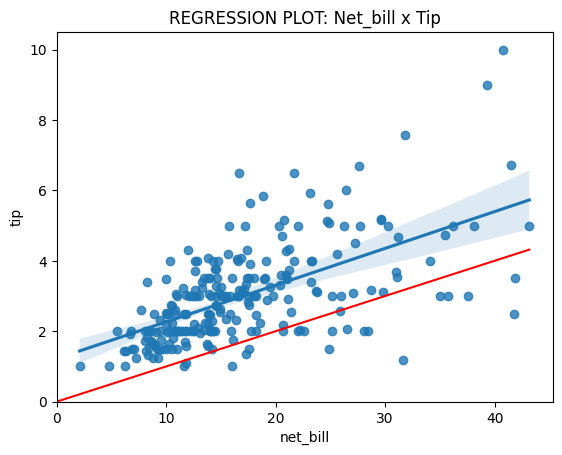

In [9]:
sns.regplot(x = 'net_bill',
            y = 'tip',
            data = tips[tips['tip_pct'] < .5])

x = np.linspace(0, tips['net_bill'].max(), 100)
y = .1*x

plt.plot(x, y, '-r', label = 'Line of 10%')
plt.title('REGRESSION PLOT: Net_bill x Tip')
plt.xlim(left = 0)
plt.ylim(bottom = 0)
plt.show()

### 2. Mudança de perspectiva

Agora ajuste um modelo de regressão de ```tip_pct``` por ```net_bill```. Construa o gráfico de dispersão correspondente.

In [14]:
modelo = smf.ols('tip_pct ~ net_bill', data=tips).fit()

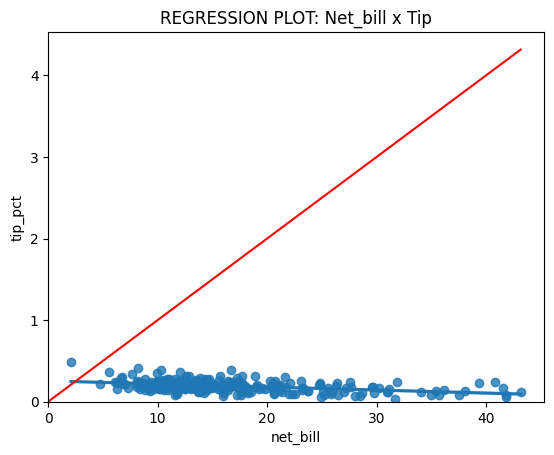

In [17]:
sns.regplot(x = 'net_bill',
            y = 'tip_pct',
            data = tips[tips['tip_pct'] < .5])

x = np.linspace(0, tips['net_bill'].max(), 100)
y = .1*x

plt.plot(x, y, '-r', label = 'Line of 10%')
plt.title('REGRESSION PLOT: Net_bill x Tip')
plt.xlim(left = 0)
plt.ylim(bottom = 0)
plt.show()

### 3. Comente

Compare os dois gráficos e comente (de forma objetiva e suscinta) a relação entre eles e a diferença do ajuste. Podemos comparar diretamente os $R^2$s?

### Comparison between the graphs

The first plot (simple scatter) shows only the data points; it doesn't make any adjustments, it just visualizes the relationship.
The second graph (with regression) includes a trend line (best linear fit of the data), allowing you to see how the independent variable influences the dependent one.

### About $R^2$s

R² only exists when there is a regression (or any prediction model).
If there is no model, there is no way to measure the "error" or the "explained proportion".

### 4. Ajuste do modelo em outra escala

Com o modelo no item 3, obtenha a preditiva do valor da gorjeta:
  1. obtenha o valor predito ```pred``` para ```tip_pct``` (dica, veja o atributo ```reg.fittedvalues```)
  2. obtenha o valor predito para ```tip``` como ```tip_pct * net_bill```
  3. calcule o $R^2$ do modelo para ```tip```
  4. compare esse $R^2$ com o do item 1

In [43]:
# 1) obtenha o valor predito pred para tip_pct
pred_tip_pct = modelo.fittedvalues

# 2) Obter o valor predito para tip como tip_pct * net_bill
pred_tip = pred_tip_pct * tips['net_bill']

# 3) Calcular o R² para tip_pct e tip

# R² para tip_pct
r2_tip_pct = r2_score(tips['tip_pct'], pred_tip_pct)

# R² para tip (comparando valor observado vs predito)
r2_tip = r2_score(tips['tip'], pred_tip)

print(f"R² for tip_pct: {r2_tip_pct:.2f}")
print(f"R² for tip: {r2_tip:.2f}")


R² for tip_pct: 0.09
R² for tip: 0.11
